# Interesting Experiments

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

SAMPLE_SIZE = 100
ARRIVAL_RATE = 1
EXECUTION_RATE = 50

## An example arrival time distribution

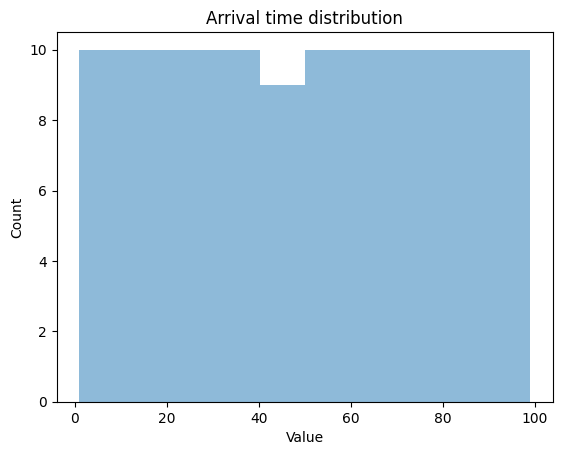

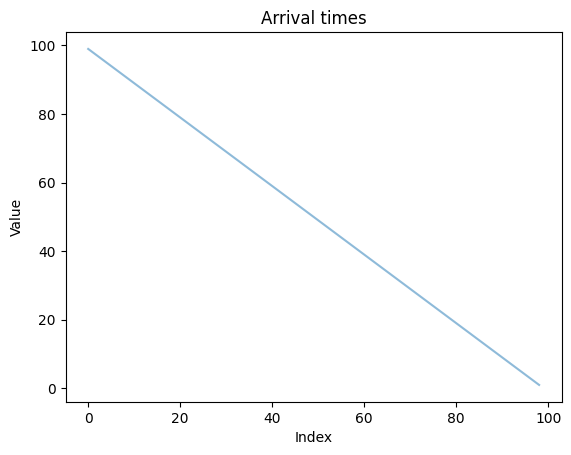

Mean arrival time: 50.0


In [2]:
inter_arrival_time = np.array([100-x for x in range(1, 100)])

plt.title("Arrival time distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(inter_arrival_time, alpha=0.5)
plt.show()

plt.title("Arrival times")
plt.xlabel("Index")
plt.ylabel("Value")
plt.plot(inter_arrival_time, alpha=0.5)
plt.show()

print(f'Mean arrival time: {inter_arrival_time.mean()}')

## Queue length over time

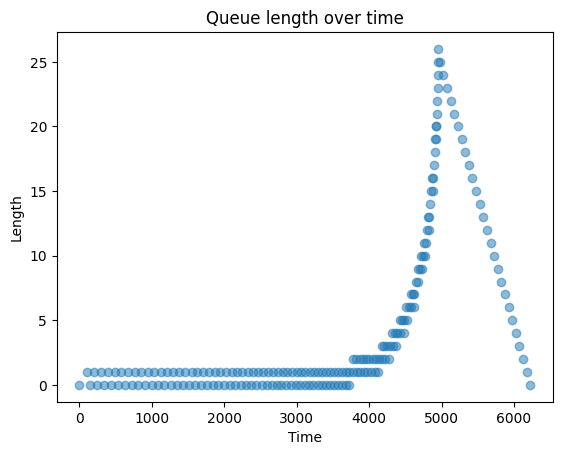

Mean queue length: 1717.2361809045226


In [3]:
from src.queue import Queue

queue = Queue(inter_arrival_time, np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=EXECUTION_RATE))
queue.process()
queue_lenght = np.array(queue.length)

plt.title("Queue length over time")
plt.xlabel("Time")
plt.ylabel("Length")
plt.scatter(*zip(*queue_lenght), alpha=0.5)
plt.show()

print(f'Mean queue length: {queue_lenght.mean()}')


## Departure time and distribution

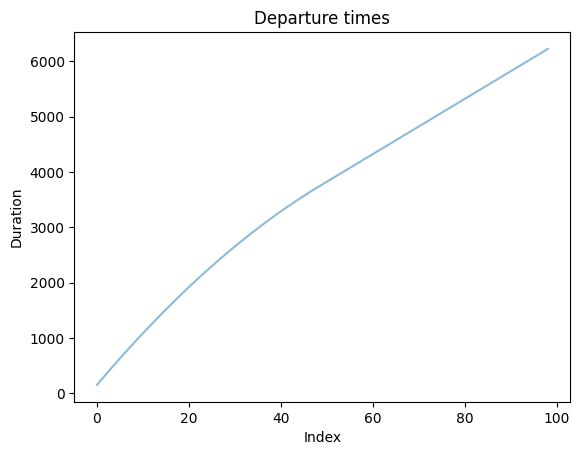

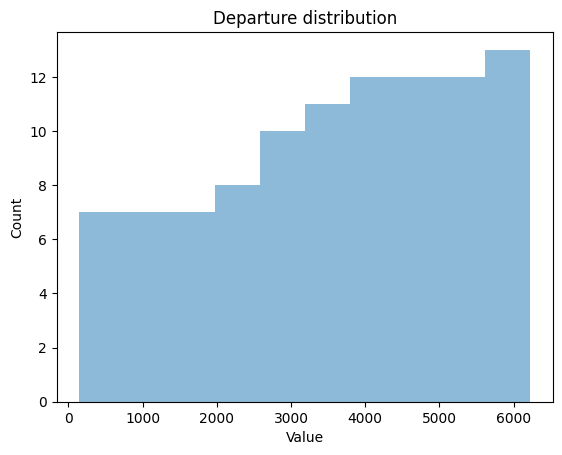

In [4]:
plt.title("Departure times")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.plot(queue.departure_times, alpha=0.5)
plt.show()

plt.title("Departure distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.departure_times, alpha=0.5)
plt.show()

## Wait time and distribution

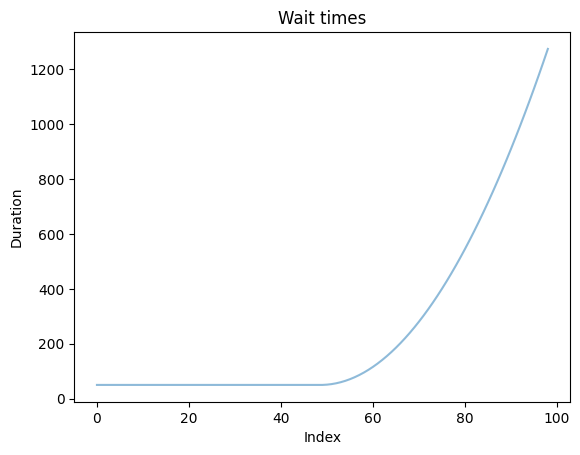

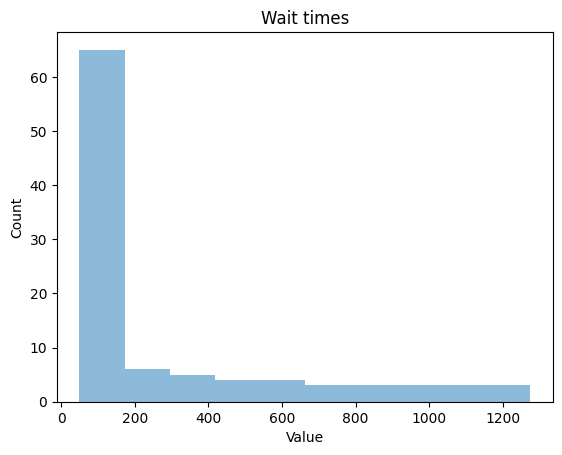

In [5]:
plt.title("Wait times")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.plot(queue.wait_times, alpha=0.5)
plt.show()

plt.title("Wait times")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.wait_times, alpha=0.5)
plt.show()

# Utilization

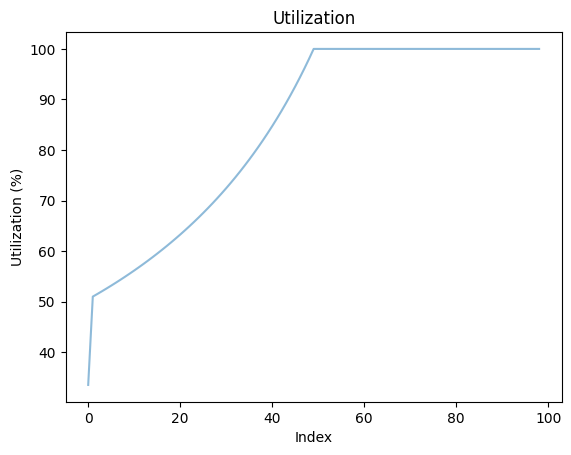

[0.3355704697986577, 0.5102040816326531, 0.5154639175257731, 0.5208333333333333, 0.5263157894736843, 0.5319148936170213, 0.5376344086021505, 0.5434782608695652, 0.5494505494505495, 0.5555555555555556, 0.5617977528089888, 0.5681818181818181, 0.5747126436781609, 0.5813953488372092, 0.5882352941176471, 0.5952380952380952, 0.6024096385542168, 0.6097560975609756, 0.617283950617284, 0.625]


In [12]:
plt.title("Utilization")
plt.xlabel("Index")
plt.ylabel("Utilization (%)")
plt.plot(queue.utilization() * 100, alpha=0.5)
plt.show()

print(queue.utilization()[:20])

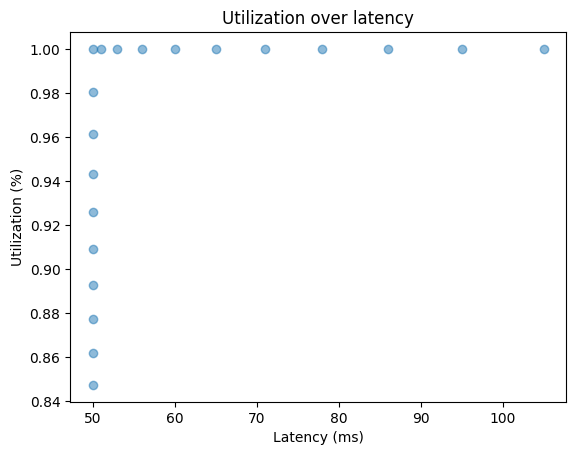

[0.3355704697986577, 0.5102040816326531, 0.5154639175257731, 0.5208333333333333, 0.5263157894736843, 0.5319148936170213, 0.5376344086021505, 0.5434782608695652, 0.5494505494505495, 0.5555555555555556]
[50 50 50 50 50 50 50 50 50 50]


In [7]:
plt.title("Utilization over latency")
plt.xlabel("Latency (ms)")
plt.ylabel("Utilization (%)")
plt.scatter(queue.wait_times[40:60], (queue.utilization(0) * 100)[40:60], alpha=0.5)
plt.show()

print((queue.utilization(0) * 100)[:10])
print(queue.wait_times[:10])